Sampling initial states using methods developed in the article
- [Olsen, Bradley, Opt. Comm. 282 (2009) 3924-3929](https://arxiv.org/ct?url=http%3A%2F%2Fdx.doi.org%2F10%252E1016%2Fj%252Eoptcom%252E2009%252E06%252E033&v=329aef68)

and some new methods we develop here

In [1]:
using PhaseSpaceTools, PyPlot

INFO: Recompiling stale cache file /Users/abradley/.julia/lib/v0.6/PhaseSpaceTools.ji for module PhaseSpaceTools.


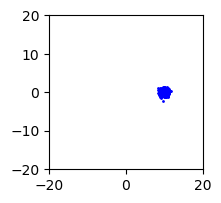

99.31421390371487 + 0.0im


In [3]:
b=10
N=1000
a,ā = coherent(b,N,dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)

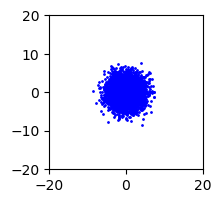

10.042346357577317 + 0.0im

In [4]:
a,ā = thermal(0,10,5000;dist="P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
mean(a.*ā)

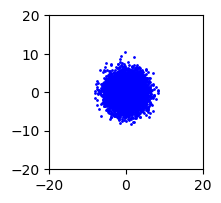

10.025163535370593 + 0.0im

In [7]:
a,ā = thermal(0,10,10000;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
mean(a.*ā)-.5

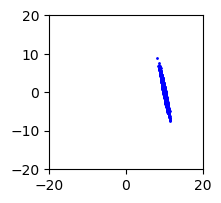

104.42478671311407 + 0.0im
104.53383099788888


In [8]:
β = 10
ϕ = π/16
r = 1.5
ϵ = r*exp(2*im*ϕ)
N = 5000
a,ā = squeezed(β,ϵ,N,dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
println(sinh(abs(ϵ)).^2+abs2(β))

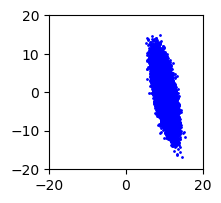

113.13322173944722
113.15411641800824


In [10]:
β = 10
ϕ = π/16
r = 2
ϵ = r*exp(2*im*ϕ)
N = 100000
a,ā = squeezed(β,ϵ,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(real(mean(a.*ā)))
println(sinh(abs(ϵ)).^2+abs2(β))

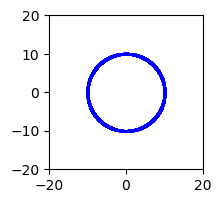

100.0020893415976 + 0.0im
100


In [11]:
n = 100
N = 100000
a,ā = fock(n,N;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=.5,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
println(n)

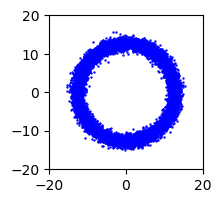

160.11363416852205 - 0.13884688659274566im
160


In [12]:
n = 160
N = 10000
a,ā = fock(n,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā))
println(n)

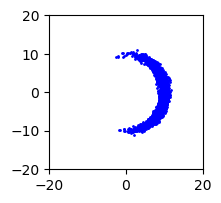

99.89031484577167 + 0.0im
100.0


In [13]:
β = 10
ϵ = 0
q = .5
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
println(sinh(abs(ϵ)).^2+abs2(β)) #not quite the right moments for crescent state, but a check of sorts

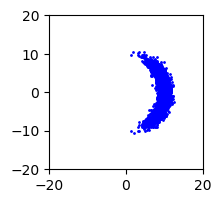

100.1893645869048 + 0.0im
100.0


In [14]:
β = 10
ϵ = 0
q = .4
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="Q")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-1)
println(sinh(abs(ϵ)).^2+abs2(β)) #not quite the right moments for crescent state, but a check of sorts

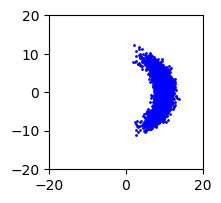

99.7002458233827 + 0.14648965480411133im
100.0


In [15]:
β = 10
ϵ = 0
q = .4
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā))
println(sinh(abs(ϵ)).^2+abs2(β)) #not quite the right moments for crescent state, but a check of sorts

# implement fock states for +W

In [2]:
function reject(P,w,N,Pmax)
    #rejection sampling the probability distribution P over the window w=[w1,w2]
    #Pmax must be numerical with value max(P) < Pmax 
    samples = Array{Float64}(1)
    while length(samples) < N + 1 
        y = w[1] + rand()*(w[2]-w[1])
        z = rand()*Pmax
        if z < P(y)
            push!(samples,y)
        end
    end
    return samples[2:end]
end
    

reject (generic function with 1 method)

In [3]:
f(x)=0.5*(exp(-x^2/2)/sqrt(2π)+exp(-(x-10)^2/8)/sqrt(8π))

f (generic function with 1 method)

In [4]:
weighted_hist(x; kws...) = PyPlot.plt[:hist](x; weights=ones(length(x))/length(x), kws...)

weighted_hist (generic function with 1 method)

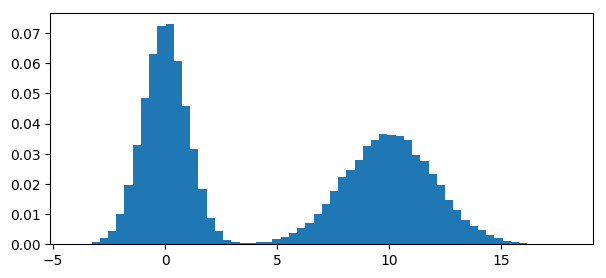

In [5]:
a = reject(f,[-5,18],100000,f(0.))
figure(figsize=(7,3))
b = weighted_hist(a,bins=60);

In [6]:
mean(a),sqrt(var(a))

(5.015351283885139, 5.246041696996848)

In [7]:
using PyCall
@pyimport scipy as sp
@pyimport scipy.special as sps
laguerreL(n,x)=sps.eval_laguerre(n,x)

laguerreL (generic function with 1 method)

In [8]:
laguerreL(0,2)

1.0

### Distribution to sample

In [28]:
G(n,x)=(2/3π)*exp(-2*x^2/3)*x*laguerreL(n,-4*x^2/3)/(3^n)
n=30
g(x)=G.(n,x)
println(sqrt(n))
println(3*sqrt(n))

5.477225575051661
16.431676725154983


In [33]:
"""

T    = eigmat(basis,M,x,ω=1.0,α=1.0)

Returns a matrix of mode functions of the chosen basis.
The matrix is in a form that allows the transformation
from the mode coefficients to the spatial grid `x`:

`ψ(x)=∑ⱼ cⱼϕⱼ(x) ≡ T*c`

where `c` is a column vector of coefficients in the basis.

At present `basis = "Hermite"` is implemented.

## Arguments
- `basis` is the set of eigenfunctions representing the c-field
- `M` is the number of modes in the spatial direction denoted by
- `x`, the spatial grid to which the coefficients are mapped.
- `ω` is the *relative* frequency, in units of the chosen reference frequency.
- `α` is an extra input for the `laguerre` basis.
Defaults of the last two arguments are 1. and 0. respectively.
"""

function eigmat(basis,M,x,ω=1.0,α=0.0)
  if basis=="Hermite"
    M > 371 && error("Quadrature does not converge for M > 371.")
    x = convert(BigFloat,x)
    ψ0 = exp.(-(√ω*x).^2/2)*BigFloat((ω/π)^(1/4))
    ψ1 = BigFloat(sqrt(2))*exp.(-(√ω*x).^2/2).*(√ω*x)*BigFloat((ω/π)^(1/4))
    T = zeros(x*ones(1,M))
    n = convert(Vector{BigFloat},collect(0:M-1))
    T[:,1] = ψ0
    T[:,2] = ψ1
    for m=1:M-2
      T[:,m+2]=sqrt(2/(n[m+2]))*(√ω*x).*T[:,m+1]-sqrt(n[m+1]/n[m+2])T[:,m]
    end
    x = convert(Vector{Float64},x)
    T = convert(Matrix{Float64},T)

  elseif basis=="Laguerre"
    n1 = (ω)^(1/2)
    ψ0 = exp.(-ω*x/2).*(ω*x).^(α/2).*n1
    ψ1 = exp.(-ω*x/2).*(1+α-(ω*x)).*n1
    T = zeros(x*ones(1,M))
    n = collect(0:M-1)
    T[:,1] = ψ0
    T[:,2] = ψ1
    for m=1:M-2
      T[:,m+2] = sqrt(n[m+2]/(n[m+2]+α)).*(2+(α-ω*x-1)/n[m+2]).*T[:,m+1] .- (1+(α-1)/n[m+2])*sqrt(n[m+2]*n[m+1]/(n[m+2]+α)/(n[m+1]+α))*T[:,m]
    end
  else
    error(basis," basis not implemented")
  end
  return T
end

eigmat

In [48]:
F(n,x)=eigmat("Laguerre",n,x)[:,end]

F (generic function with 1 method)

In [49]:
F(3,.1)

1-element Array{Float64,1}:
 0.76574

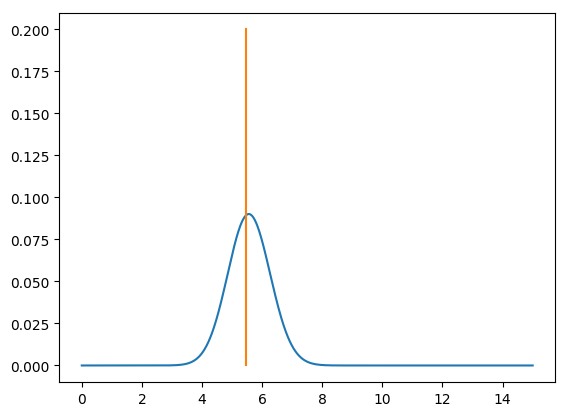

0.15915494309189532

In [29]:
x=linspace(0,15,1000);dx=x[2]-x[1];
plot(x,g(x));plot(sqrt(n)*ones(x),linspace(0,.2,1000))
sum(g(x)*dx)

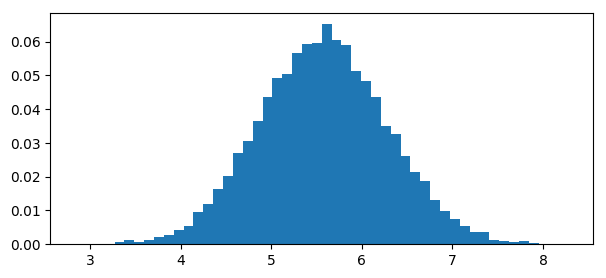

In [43]:
x1=0;x2=3*sqrt(n)
N=10000
Nb=50
a = reject(g,[x1,x2],N,.2)
figure(figsize=(7,3))
b = weighted_hist(a,bins=Nb);

In [44]:
function fock(n,N)
    γ = (randn(N)+im*randn(N))/sqrt(2)
    z = reject(x->G.(n,x),[0,3*sqrt(n)],N,.2)
    μ = z.*exp.(2π*im*rand(N))
    α = μ + γ
    ᾱ = conj(μ - γ)
    return α, ᾱ
end

fock (generic function with 1 method)

In [47]:
a,ā = fock(20,10000)

(Complex{Float64}[-0.635626+5.21513im, 4.84558-1.65275im, -2.35471+4.01112im, 2.5735-3.67623im, -4.30519+0.535635im, 5.16946-3.42316im, -0.570234-3.27709im, 0.0391132+4.62622im, 1.73938-2.30051im, 3.32386+2.7183im  …  -4.24572-0.706769im, -4.04734+5.76851im, -2.73109-3.61228im, 0.807578+3.4909im, -3.82333+3.60803im, 4.48212+0.644385im, 1.60815+4.28623im, 4.3688-1.11093im, -2.15039+3.4262im, -3.9942+3.39195im], Complex{Float64}[-1.84764-4.10407im, 3.38836+1.29255im, -2.67507-4.76893im, 2.28862+3.46578im, -4.33674+1.46989im, 4.95239+2.51783im, -1.37302+4.30191im, 0.274026-5.68186im, 3.27397+4.27932im, 4.75984-3.74424im  …  -3.22911+0.908765im, -3.10871-3.49569im, -3.88962+2.67462im, 0.909381-4.16757im, -2.56417-4.21835im, 4.89696+1.48613im, -0.195663-6.1292im, 5.23945+2.24392im, -1.0864-4.67363im, -2.14226-3.20653im])

In [55]:
n̄ = mean(a.*ā)-.5

19.953142661331338 - 0.1154206054133665im

In [57]:
Vn = mean(a.^2.*ā.^2) - n̄ - n̄^2

-0.6921902068177133 - 0.14544517749077457im

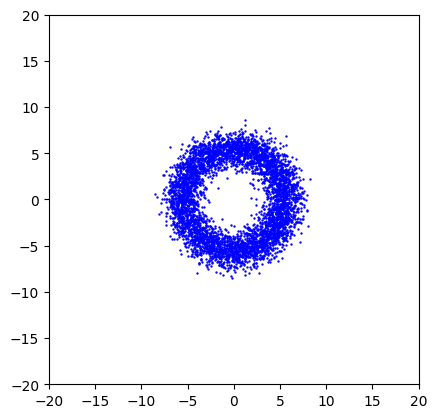

30.431035714549193 + 0.164089503916942im
30


In [58]:
n = 30
N = 5000
a,ā = fock(n,N)
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā))
println(n)